In [1]:
!pip install geihdanepy
import geihdanepy as geih
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import chi2
from scipy.stats import multivariate_normal
from scipy.stats import normaltest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_regression, make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pickle as pkl

In [3]:
data = geih.datos(2021,'junio','Caracteristicas','Cabecera')

In [4]:
data2 = geih.datos(2021,'junio','Ocupados','Cabecera')

Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.


In [5]:
pd.options.display.max_columns = None
data

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6080,P6080S1,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P3147S1,P3147S2,P3147S3,P3147S4,P3147S5,P3147S6,P3147S7,P3147S8,P3147S9,P3147S10,P3147S11,P3147S10A1,P3246,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA,CLASE,ESC,MES,DPTO,fex_c_2011
0,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116"
1,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116"
2,5468958,1,3,1,10,3,2,11,1967,53,5,5,,6,3,,2,,,,,,1,1,,,,,,,,,,1,,,3,,,2,1,2,,3,3,,,05,1,3,6,5,"1442,39108680116"
3,5468958,1,4,1,10,4,1,8,2006,14,5,5,,6,3,,2,,,,,,,,,,,1,,,,,,1,,,3,,,2,1,1,1,4,8,,,05,1,8,6,5,"1442,39108680116"
4,5468958,1,5,1,10,5,1,1,2007,14,5,5,,6,2,,2,,,,,,,,,,,1,,,,,,1,,,1,5,,2,1,1,1,4,8,,,05,1,8,6,5,"1442,39108680116"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,5494047,1,2,1,10,2,1,7,1983,37,2,6,,2,3,,2,,1,1,,,,,,,,,,,1,,,2,1,12,,,,9,1,2,,3,5,,,66,1,5,6,66,"422,469753006258"
53388,5494047,1,3,1,10,3,2,7,1999,22,3,6,,6,1,2,1,1,,,,,,,,,,,,,1,,,2,1,12,,,,2,1,2,,5,11,2,,66,1,11,6,66,"422,469753006258"
53389,5494047,1,4,1,10,4,2,7,2001,20,3,6,,6,1,2,1,1,,,,,,,,,,,,,1,,,2,1,12,,,,2,1,2,,5,11,2,,66,1,11,6,66,"422,469753006258"
53390,5494047,1,5,1,10,1,2,11,2009,11,3,6,,6,1,2,1,1,,,,,,,,,,,,,1,,,2,1,6,,,,2,1,2,,3,5,,,66,1,5,6,66,"422,469753006258"


In [6]:
pd.options.display.max_columns = None
data2

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,AREA,CLASE,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P3148,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D_R4,OCI,MES,P6430,RAMA4D_R4,INGLABO,DPTO,fex_c_2011,RAMA4DP8_R4
0,5468958,1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
1,5468958,1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
2,5468959,1,2,1,60,5,1,5,1,2,2,12,1,,,1,1,2,1,96,,5,,1,1000000,2,,,2,,2,,2,,2,,2,,,1,106454,2,2,,,2,,,2,,,2,,,1,1000000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,9,7,,1,,1,1,1,8,1,1,,,,,,,,,1,1,2,,,,,2,,,,,,,,,2,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,1,,39,85,1,6,1,8541,1000000,5,"867,171073921304",
3,5468960,1,1,1,60,5,1,5,1,2,2,3,1,,,1,1,2,1,1,,1,,2,908526,2,,,2,,2,,2,,2,,2,,,1,106454,2,2,,,2,,,2,,,2,,,2,,2,,2,,2,,2,,2,,,.,,,,,,,,,.,1,,,,,,,,,48,,.,48,,,9,7,,1,,1,1,1,0,1,1,,,,,,,,,1,1,1,72,24,1,,2,,,,,,,,1,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,8,,39,22,1,6,1,2229,908526,5,"1195,30537084732",
4,5468960,1,2,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,4,,1,,2,1000000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,38000,2,2,,,2,,,2,,,1,980000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,7,9,,1,,1,1,1,15,1,1,,,,,,,,,1,1,1,0,24,1,,2,,,,,,,,1,4,90,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,8,,95,41,1,6,1,4112,1000000,5,"1195,30537084732",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5494047,1,1,1,60,66,1,66,1,1,,,1,,,1,2,2,2,7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3,,,,,3,800000,1,,3,,12,2,,,,,3,1,2,48,,.,40,2,,6,7,,10,,2,,,,1,,,,,,,,,1,2,2,1,0,24,1,,2,,,,,,,,1,3,10,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,79,14,1,6,4,1410,800000,66,"422,469753006258",
21579,5494047,1,2,1,60,66,1,66,1,1,,,1,,,1,2,2,2,1,,1,,2,850000,2,,,2,,2,,2,,2,,2,,,2,,,2,,,2,,,2,,,2,,,2,,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,44,2,,3,7,,11,,2,,,,1,,,,,,,,,1,2,2,1,0,12,4,,2,,,,,,,,8,3,30,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,45,47,1,6,1,4752,850000,66,"422,469753006258",
21580,5494047,1,3,1,60,66,

In [7]:
data3 =(pd.merge(data,data2,
  on='DIRECTORIO'))
data3

,DIRECTORIO,SECUENCIA_P_x,ORDEN_x,HOGAR_x,REGIS_x,P6016,P6020,P6030S1,P6030S3,P6040,P6050,P6080,P6080S1,P6070,P6081,P6081S1,P6083,P6083S1,P6071,P6071S1,P3147S1,P3147S2,P3147S3,P3147S4,P3147S5,P3147S6,P3147S7,P3147S8,P3147S9,P3147S10,P3147S11,P3147S10A1,P3246,P6090,P6140,P6150,P6100,P6110,P6120,P6125,P6160,P6170,P6175,P6210,P6210S1,P6220,P6269,AREA_x,CLASE_x,ESC,MES_x,DPTO_x,fex_c_2011_x,SECUENCIA_P_y,ORDEN_y,HOGAR_y,REGIS_y,AREA_y,CLASE_y,P388,P6440,P6450,P6460,P6460S1,P6400,P6410,P6410S1,P6422,P6424S1,P6424S2,P6424S3,P6426,P6430S1,P6480,P6480S1,P9440,P6500,P6510,P6510S1,P6510S2,P6590,P6590S1,P6600,P6600S1,P6610,P6610S1,P6620,P6620S1,P6585S1,P6585S1A1,P6585S1A2,P6585S2,P6585S2A1,P6585S2A2,P6585S3,P6585S3A1,P6585S3A2,P6585S4,P6585S4A1,P6585S4A2,P6545,P6545S1,P6545S2,P6580,P6580S1,P6580S2,P6630S1,P6630S1A1,P6630S2,P6630S2A1,P6630S3,P6630S3A1,P6630S4,P6630S4A1,P6630S6,P6630S6A1,P6640,P6640S1,P6765,P6765S1,P6772,P6772S1,P6773S1,P6775,P6750,P6760,P550,P6780,P6780S1,P6790,P1800,P1800S1,P1801S1,P1801S2,P1801S3,P1802,P1879,P1805,P6800,P6810,P6810S1,P6850,P6830,P6830S1,P6870,P6880,P6880S1,P6915,P6915S1,P6920,P6930,P6940,P6960,P6980,P6980S1,P6980S2,P6980S3,P6980S4,P6980S5,P6980S6,P6980S7,P6980S7A1,P6980S8,P6990,P9450,P7020,P760,P7026,P7028,P7028S1,P7040,P390,P7045,P7050,P7050S1,P7070,P7075,P7077,P1880,P1881,P1882,P3148,P7090,P7100,P7110,P7120,P7130,P7140,P7140S1,P7140S2,P7140S3,P7140S4,P7140S5,P7140S6,P7140S7,P7140S8,P7140S9,P7140S9A1,P7150,P7160,P7170S1,P7170S5,P7170S6,P7180,P514,P515,P7240,P7240S1,OFICIO,RAMA2D_R4,OCI,MES_y,P6430,RAMA4D_R4,INGLABO,DPTO_y,fex_c_2011_y,RAMA4DP8_R4
0,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
1,5468958,1,1,1,10,1,2,12,1992,28,1,5,,6,3,,1,3,,,,,,1,,,,,,,,,2,1,,,1,1,64000,2,1,2,,6,2,3,,05,1,13,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
2,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
3,5468958,1,2,1,10,1,1,8,2012,8,3,5,,,2,,1,1,,,,,,,,,,,,,,,,1,,,1,5,,2,1,1,1,3,2,,,05,1,2,6,5,"1442,39108680116",1,3,1,60,5,1,5,2,,,,,,,,,,,120,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,,2,,,2,700000,1,,3,,12,2,,,,,3,3,2,70,,.,70,,,1,6,,2,,2,,,,1,,,,,,,,,1,2,2,1,24,96,4,,2,,,,,,,,11,11,15,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,9,,45,47,1,6,4,4781,700000,5,"1442,39108680116",
4,5468958,1,3,1,10,3,2,11,1967,53,5,5,,6,3,,2,,,,,,1,1,,,,,,,,,,1,,,3,,,2,1,2,,3,3,,,05,1,3,6,5,"1442,39108680116",1,1,1,60,5,1,5,1,2,1,,1,,,1,1,2,1,42,,7,POR PRACTICAS,2,1600000,2,,,2,,2,,2,,2,,2,,,1,106454,2,1,34800,2,2,,,2,,,2,,,1,1600000,2,,2,,2,,2,,2,,,.,,,,,,,,,.,12,,,,,,,,,48,,.,48,,,8,7,,1,,1,1,1,7,1,1,,,,,,,,,1,1,1,12,4,3,,2,,,,,,,,3,4,60,,2,,,,2,,,,,,,,,,,,,,1,1,1,2,1,1,3,,33,10,1,6,1,1089,1600000,5,"1442,39108680116",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [8]:
o=data3.isna().sum()
y=[]
for i in o:
  if i !=0:
    y.append(i)
print(y)
len(y)

[]


0

In [9]:
data3.duplicated().sum()

0

In [10]:
for i in data3.columns:
  print(i)
  print(data3[i].nunique()) 
  print(data3[i].unique())

DIRECTORIO
13513
[5468958 5468959 5468960 ... 5494045 5494046 5494047]
SECUENCIA_P_x
5
[1 2 3 4 5]
ORDEN_x
19
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
HOGAR_x
5
[1 2 3 4 5]
REGIS_x
1
[10]
P6016
19
[ 1  3  4  5  2  7  6  9 10  8 11 12 13 14 16 18 19 15 17]
P6020
2
[2 1]
P6030S1
13
['12' '8' '11' '1' '6' '5' '2' '7' '9' '10' '3' '4' ' ']
P6030S3
106
['1992' '2012' '1967' '2006' '2007' '1969' '1994' '2000' '1991' '1988'
 '2010' '2002' '1985' '2020' '1995' '2017' '1996' '2019' '1990' '1974'
 '1989' '2014' '2018' '1968' '2005' '1936' '1944' '1977' '1997' '2003'
 '1981' '2004' '1976' '1975' '1999' '2016' '1984' '1931' '1952' '1963'
 '1973' '2015' '1954' '1998' '1980' '2008' '1972' '1982' '2009' '1960'
 '1939' '1979' '2001' '1971' '1947' '1987' '1955' '1957' '1958' '1959'
 '1966' '1962' '1937' '1964' '1948' '1970' '1986' '2013' '1978' '1938'
 '2011' '1983' '1949' '1927' '1993' '1965' '1926' '1946' '1945' '1956'
 '1961' '1941' '1951' '1943' '1953' '1930' '2021' '1940' '1933' 

In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83205 entries, 0 to 83204
Columns: 218 entries, DIRECTORIO to RAMA4DP8_R4
dtypes: int64(52), object(166)
memory usage: 139.0+ MB


In [12]:
data4=pd.DataFrame(data3,columns=["INGLABO","P6050","P6020","P6040",'P6070',"ESC","P6426","P6430","P6800","P6585S1","P6585S2","P6585S3","P6585S4"])
data4

,INGLABO,P6050,P6020,P6040,P6070,ESC,P6426,P6430,P6800,P6585S1,P6585S2,P6585S3,P6585S4
0,1600000,1,2,28,6,13,42,1,48,2,1,1,2
1,700000,1,2,28,6,13,120,4,70,,,,
2,1600000,3,1,8,,2,42,1,48,2,1,1,2
3,700000,3,1,8,,2,120,4,70,,,,
4,1600000,5,2,53,6,3,42,1,48,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83200,800000,5,1,33,6,5,7,4,48,,,,
83201,850000,5,1,33,6,5,1,1,48,2,2,2,2
83202,800000,5,1,33,6,5,6,4,48,,,,
83203,750000,5,1,33,6,5,6,4,48,,,,


In [13]:
data4.rename(columns={"INGLABO":"ingresos","P6050":"jefe_hogar","P6020":"sexo","P6040":"edad",'P6070':"estado_civil","ESC":"escolaridad",
                      "P6426":"time_traba","P6430":"tipo_traba","P6800":"horas_traba","P6585S1":"sub_alimenta","P6585S2":"sub_transpor","P6585S3":"sub_fami","P6585S4":"sub_edu"}, inplace=True)

In [14]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83205 entries, 0 to 83204
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ingresos      83205 non-null  object
 1   jefe_hogar    83205 non-null  int64 
 2   sexo          83205 non-null  int64 
 3   edad          83205 non-null  int64 
 4   estado_civil  83205 non-null  object
 5   escolaridad   83205 non-null  object
 6   time_traba    83205 non-null  int64 
 7   tipo_traba    83205 non-null  int64 
 8   horas_traba   83205 non-null  int64 
 9   sub_alimenta  83205 non-null  object
 10  sub_transpor  83205 non-null  object
 11  sub_fami      83205 non-null  object
 12  sub_edu       83205 non-null  object
dtypes: int64(6), object(7)
memory usage: 8.9+ MB


In [15]:
pd.options.display.max_columns = None
data4.isna()

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83200,False,False,False,False,False,False,False,False,False,False,False,False,False
83201,False,False,False,False,False,False,False,False,False,False,False,False,False
83202,False,False,False,False,False,False,False,False,False,False,False,False,False
83203,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data4=data4.dropna().reset_index(drop=True)
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu
0,1600000,1,2,28,6,13,42,1,48,2,1,1,2
1,700000,1,2,28,6,13,120,4,70,,,,
2,1600000,3,1,8,,2,42,1,48,2,1,1,2
3,700000,3,1,8,,2,120,4,70,,,,
4,1600000,5,2,53,6,3,42,1,48,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83200,800000,5,1,33,6,5,7,4,48,,,,
83201,850000,5,1,33,6,5,1,1,48,2,2,2,2
83202,800000,5,1,33,6,5,6,4,48,,,,
83203,750000,5,1,33,6,5,6,4,48,,,,


In [17]:
data4.duplicated().sum()

1015

In [18]:
data4=data4.drop_duplicates().reset_index(drop=True)

In [19]:
data4.duplicated().sum()

0

In [20]:
o=data4.isna().sum()
y=[]
for i in o:
  if i !=0:
    y.append(i)
print(y)
len(y)

[]


0

In [21]:
for i in data4.columns:
  print(i)
  print(data4[i].nunique()) 
  print(data4[i].unique())

ingresos
777
['1600000' '700000' '1000000' '908526' '600000' '910000' '80000' '350000'
 '1250000' '1180000' '1080000' '800000' '900000' '100000' '1200000'
 '1480000' '1142000' '1400000' '1508526' '1010000' '1100000' '500000'
 '650000' '200000' '325000' '50000' ' ' '2500000' '1028526' '908000'
 '908500' '450000' '2000000' '670000' '2080000' '1196000' '3500000'
 '920000' '560000' '150000' '2400000' '1260000' '3300000' '980000'
 '1900000' '5000000' '3000000' '1700000' '1500000' '1300000' '1750000'
 '1800000' '950000' '400000' '4000000' '2200000' '360000' '300000'
 '4100000' '7000000' '0' '225000' '1014000' '120000' '320000' '36000'
 '3700000' '312000' '12000000' '1190000' '2700000' '1760000' '1148000'
 '1230000' '4500000' '1150000' '30000' '1008526' '180000' '1050000'
 '20000' '280000' '3400000' '2103000' '250000' '1090000' '681000'
 '2360000' '1380000' '1817052' '1280000' '1450000' '906000' '660000'
 '520000' '60000' '1320000' '1980000' '480000' '1106000' '1156000'
 '850000' '12000' '958

In [22]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82190 entries, 0 to 82189
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ingresos      82190 non-null  object
 1   jefe_hogar    82190 non-null  int64 
 2   sexo          82190 non-null  int64 
 3   edad          82190 non-null  int64 
 4   estado_civil  82190 non-null  object
 5   escolaridad   82190 non-null  object
 6   time_traba    82190 non-null  int64 
 7   tipo_traba    82190 non-null  int64 
 8   horas_traba   82190 non-null  int64 
 9   sub_alimenta  82190 non-null  object
 10  sub_transpor  82190 non-null  object
 11  sub_fami      82190 non-null  object
 12  sub_edu       82190 non-null  object
dtypes: int64(6), object(7)
memory usage: 8.2+ MB


In [23]:
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu
0,1600000,1,2,28,6,13,42,1,48,2,1,1,2
1,700000,1,2,28,6,13,120,4,70,,,,
2,1600000,3,1,8,,2,42,1,48,2,1,1,2
3,700000,3,1,8,,2,120,4,70,,,,
4,1600000,5,2,53,6,3,42,1,48,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82185,800000,5,1,33,6,5,7,4,48,,,,
82186,850000,5,1,33,6,5,1,1,48,2,2,2,2
82187,800000,5,1,33,6,5,6,4,48,,,,
82188,750000,5,1,33,6,5,6,4,48,,,,


In [24]:
data4=data4.replace({" ":0})

In [25]:
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu
0,1600000,1,2,28,6,13,42,1,48,2,1,1,2
1,700000,1,2,28,6,13,120,4,70,0,0,0,0
2,1600000,3,1,8,0,2,42,1,48,2,1,1,2
3,700000,3,1,8,0,2,120,4,70,0,0,0,0
4,1600000,5,2,53,6,3,42,1,48,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82185,800000,5,1,33,6,5,7,4,48,0,0,0,0
82186,850000,5,1,33,6,5,1,1,48,2,2,2,2
82187,800000,5,1,33,6,5,6,4,48,0,0,0,0
82188,750000,5,1,33,6,5,6,4,48,0,0,0,0


In [26]:
variable_edad=data4.loc[::1,"edad"]
variable_edad
variable_edad.describe()

count    82190.000000
mean        33.101180
std         20.255693
min          0.000000
25%         17.000000
50%         30.000000
75%         48.000000
max        105.000000
Name: edad, dtype: float64

In [27]:
Q_1e=variable_edad.quantile(0.25)
Q_3e=variable_edad.quantile(0.75)
rango_intercue=Q_3e-Q_1e
limite_supe=(rango_intercue*1.5)+Q_3e
limite_infe=Q_1e-(1.5*rango_intercue)
outlier_1e=variable_edad[(variable_edad>limite_supe)]
limite_infe=max([variable_edad.min(),limite_infe])
limite_infe
indice_out=outlier_1e.index
no_outlierse=variable_edad[~variable_edad.index.isin(indice_out)]
outliers_2e=no_outlierse[no_outlierse<min([limite_infe])]

In [28]:
data4["edad"]=no_outlierse
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu
0,1600000,1,2,28.0,6,13,42,1,48,2,1,1,2
1,700000,1,2,28.0,6,13,120,4,70,0,0,0,0
2,1600000,3,1,8.0,0,2,42,1,48,2,1,1,2
3,700000,3,1,8.0,0,2,120,4,70,0,0,0,0
4,1600000,5,2,53.0,6,3,42,1,48,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82185,800000,5,1,33.0,6,5,7,4,48,0,0,0,0
82186,850000,5,1,33.0,6,5,1,1,48,2,2,2,2
82187,800000,5,1,33.0,6,5,6,4,48,0,0,0,0
82188,750000,5,1,33.0,6,5,6,4,48,0,0,0,0


In [29]:
variable_edad=data4.loc[::1,"edad"]
nul=variable_edad[(variable_edad<=18)]
nul_index=nul.index
no_nul=variable_edad[~variable_edad.index.isin(nul_index)]
data4["edad"]=no_nul

In [30]:
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu
0,1600000,1,2,28.0,6,13,42,1,48,2,1,1,2
1,700000,1,2,28.0,6,13,120,4,70,0,0,0,0
2,1600000,3,1,NaN,0,2,42,1,48,2,1,1,2
3,700000,3,1,NaN,0,2,120,4,70,0,0,0,0
4,1600000,5,2,53.0,6,3,42,1,48,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82185,800000,5,1,33.0,6,5,7,4,48,0,0,0,0
82186,850000,5,1,33.0,6,5,1,1,48,2,2,2,2
82187,800000,5,1,33.0,6,5,6,4,48,0,0,0,0
82188,750000,5,1,33.0,6,5,6,4,48,0,0,0,0


In [31]:
data4.isna().sum()

ingresos            0
jefe_hogar          0
sexo                0
edad            22513
estado_civil        0
escolaridad         0
time_traba          0
tipo_traba          0
horas_traba         0
sub_alimenta        0
sub_transpor        0
sub_fami            0
sub_edu             0
dtype: int64

In [32]:
data4=data4.dropna().reset_index(drop=True)
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu
0,1600000,1,2,28.0,6,13,42,1,48,2,1,1,2
1,700000,1,2,28.0,6,13,120,4,70,0,0,0,0
2,1600000,5,2,53.0,6,3,42,1,48,2,1,1,2
3,700000,5,2,53.0,6,3,120,4,70,0,0,0,0
4,1000000,1,2,51.0,6,11,96,1,48,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59672,800000,5,1,33.0,6,5,7,4,48,0,0,0,0
59673,850000,5,1,33.0,6,5,1,1,48,2,2,2,2
59674,800000,5,1,33.0,6,5,6,4,48,0,0,0,0
59675,750000,5,1,33.0,6,5,6,4,48,0,0,0,0


In [33]:
variable_horastraba=data4.loc[::1,"horas_traba"]
variable_horastraba
variable_horastraba.describe()

count    59677.000000
mean        44.730181
std         14.173890
min          1.000000
25%         40.000000
50%         48.000000
75%         48.000000
max        130.000000
Name: horas_traba, dtype: float64

In [34]:
Q_1h=variable_horastraba.quantile(0.25)
Q_3h=variable_horastraba.quantile(0.75)
rango_intercuh=Q_3h-Q_1h
limite_suph=(rango_intercuh*1.5)+Q_3h
limite_infh=Q_1h-(1.5*rango_intercuh)
outlier_1e=variable_horastraba[(variable_horastraba>limite_suph)]
indice_outh=outlier_1e.index
no_outliersh=variable_horastraba[~variable_horastraba.index.isin(indice_outh)]
outliers_2h=no_outliersh[no_outliersh<min([limite_infh])]

In [35]:
data4["horastraba"]=no_outliersh
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu,horastraba
0,1600000,1,2,28.0,6,13,42,1,48,2,1,1,2,48.0
1,700000,1,2,28.0,6,13,120,4,70,0,0,0,0,NaN
2,1600000,5,2,53.0,6,3,42,1,48,2,1,1,2,48.0
3,700000,5,2,53.0,6,3,120,4,70,0,0,0,0,NaN
4,1000000,1,2,51.0,6,11,96,1,48,2,1,2,2,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59672,800000,5,1,33.0,6,5,7,4,48,0,0,0,0,48.0
59673,850000,5,1,33.0,6,5,1,1,48,2,2,2,2,48.0
59674,800000,5,1,33.0,6,5,6,4,48,0,0,0,0,48.0
59675,750000,5,1,33.0,6,5,6,4,48,0,0,0,0,48.0


In [36]:
data4=data4.dropna().reset_index(drop=True)
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu,horastraba
0,1600000,1,2,28.0,6,13,42,1,48,2,1,1,2,48.0
1,1600000,5,2,53.0,6,3,42,1,48,2,1,1,2,48.0
2,1000000,1,2,51.0,6,11,96,1,48,2,1,2,2,48.0
3,1000000,3,2,26.0,6,14,96,1,48,2,1,2,2,48.0
4,1000000,3,2,21.0,6,11,96,1,48,2,1,2,2,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55773,800000,5,1,33.0,6,5,7,4,48,0,0,0,0,48.0
55774,850000,5,1,33.0,6,5,1,1,48,2,2,2,2,48.0
55775,800000,5,1,33.0,6,5,6,4,48,0,0,0,0,48.0
55776,750000,5,1,33.0,6,5,6,4,48,0,0,0,0,48.0


In [37]:
data4.describe()

,jefe_hogar,sexo,edad,time_traba,tipo_traba,horas_traba,horastraba
count,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000
mean,2.430421,1.526946,41.939618,78.023594,2.758148,42.639392,42.639392
std,1.602538,0.499278,16.315493,107.736190,1.569433,11.948366,11.948366
min,1.000000,1.000000,19.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,28.000000,8.000000,1.000000,40.000000,40.000000
50%,2.000000,2.000000,40.000000,30.000000,4.000000,48.000000,48.000000
75%,3.000000,2.000000,54.000000,108.000000,4.000000,48.000000,48.000000
max,9.000000,2.000000,94.000000,780.000000,9.000000,60.000000,60.000000


DESCRIPCIÓN SUNCITA DE LAS VARIABLES
* "INGLABO" = Ingresos Laborales
* "P6050" = Variable discreta numerica que da información sobre ¿Cuál es el parentesco de ... con el jefe o jefa del hogar? a. Jefe (a) del hogar b. Pareja, esposo(a), cónyuge, compañero(a) c. Hijo(a), hijastro(a) d. Nieto(a) e. Otro pariente f. Empleado(a) del servicio doméstico y sus parientes g. Pensionista h.Trabajador i. Otro no pariente
* "P6020" = Discreta numerica Información del Sexo del usuario 1 Hombre 2 Mujer
* "P6040" = Variable Continua Numerica, ¿Cuántos años cumplidos tiene … ? Valores numericos en años, Si es menor de 1 año, escriba 00. 
* 'P6070' = Discreta numerica, Información del Estado Civil del Usuario;Actualmente: a. No esta casado(a) y vive en pareja hace menos de dos años b. No esta casado (a) y vive en pareja hace dos años o más c. Esta casado (a) d. Esta separado (a) o divorciado (a) e.Esta viudo (a) f. Esta soltero (a)
* "ESC"= Continua Numerica que da los Años de escolaridad 
* "P6426"=Variable Continua Numerica, respuesta a *¿cuanto tiempo lleva trabajando en esta empresa, negocio,industria, oficina, firma o finca de manera continua?* se obtiene el valor en meses, si es menos de un mes el dato es 000
* "P6430"=Discreta Numerica- Categorica se tiene información sobre el tipo de trabajo este puede ser:*1. Obrero o empleado de empresa particular 2. Obrero o empleado del gobierno 3. Empleado doméstico 4. Trabajador por cuenta propia 5. Patrón o empleador 6. Trabajador familiar sin remuneración 7. Trabajador sin
remuneración en empresas o negocios de otros hogares 8. Jornalero o peón 9.Otro* 
* "P6800"=Variable Continua Numerica que nos da información sobre: *¿Cuántas horas a la semana trabaja normalmente.... en ese trabajo ? en Horas* 
* "P6585S1"= Discreta Numerica información sobre si recibio el mes pasado subsidio o auxilio de alimentación 1 Sí 2 No 9 No sabe, no informa
* "P6585S2"=Discreta Numerica información sobre si recibio el mes pasado subsidio o auxilio de transporte 1 Sí 2 No 9 No sabe, no informa
* "P6585S3"= Discreta Numerica información sobre si recibio el mes pasado subsidio o auxilio familiar 1 Sí 2 No 9 No sabe, no informa
* "P6585S4"=Discreta Numerica información sobre si recibio el mes pasado subsidio o auxilio de educación 1 Sí 2 No 9 No sabe, no informa

In [38]:
data4.rename(columns={"INGLABO":"ingresos","P6050":"jefe_hogar","P6020":"sexo","P6040":"edad",'P6070':"estado_civil","ESC":"escolaridad",
                      "P6426":"time_traba","P6430":"tipo_traba","P6800":"horas_traba","P6585S1":"sub_alimenta","P6585S2":"sub_transpor","P6585S3":"sub_fami","P6585S4":"sub_edu"}, inplace=True)

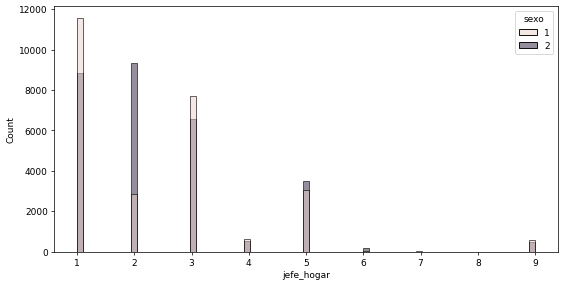

In [39]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=65)
p = sns.histplot(data=data4, x=data4["jefe_hogar"], hue=data4["sexo"], ax=ax)

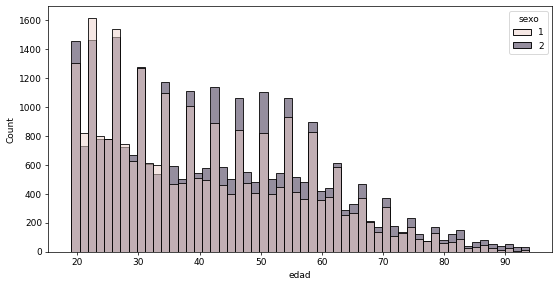

In [42]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=65)
p = sns.histplot(data=data4, x=data4["edad"], hue=data4["sexo"], ax=ax)

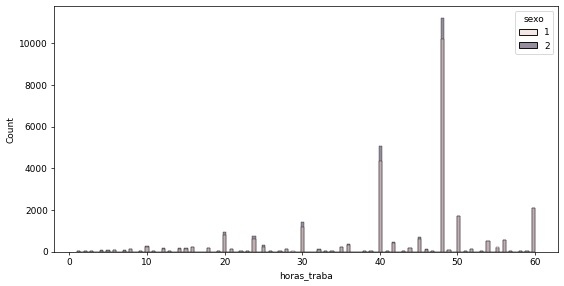

In [43]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=65)
p = sns.histplot(data=data4, x=data4["horas_traba"], hue=data4["sexo"], ax=ax)

In [46]:
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu,horastraba
0,1600000,1,2,28.0,6,13,42,1,48,2,1,1,2,48.0
1,1600000,5,2,53.0,6,3,42,1,48,2,1,1,2,48.0
2,1000000,1,2,51.0,6,11,96,1,48,2,1,2,2,48.0
3,1000000,3,2,26.0,6,14,96,1,48,2,1,2,2,48.0
4,1000000,3,2,21.0,6,11,96,1,48,2,1,2,2,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55773,800000,5,1,33.0,6,5,7,4,48,0,0,0,0,48.0
55774,850000,5,1,33.0,6,5,1,1,48,2,2,2,2,48.0
55775,800000,5,1,33.0,6,5,6,4,48,0,0,0,0,48.0
55776,750000,5,1,33.0,6,5,6,4,48,0,0,0,0,48.0


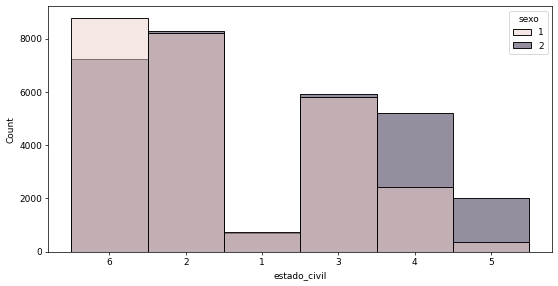

In [53]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=65)
p = sns.histplot(data=data4, x=data4["estado_civil"],hue=data4["sexo"],ax=ax)

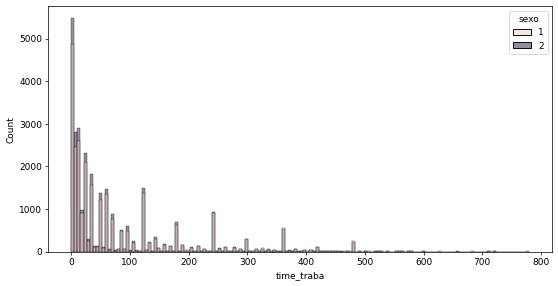

In [51]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=65)
p = sns.histplot(data=data4, x=data4["time_traba"],hue=data4["sexo"],ax=ax)

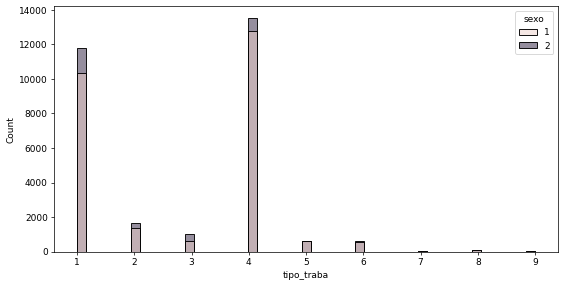

In [52]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=65)
p = sns.histplot(data=data4, x=data4["tipo_traba"],hue=data4["sexo"],ax=ax)

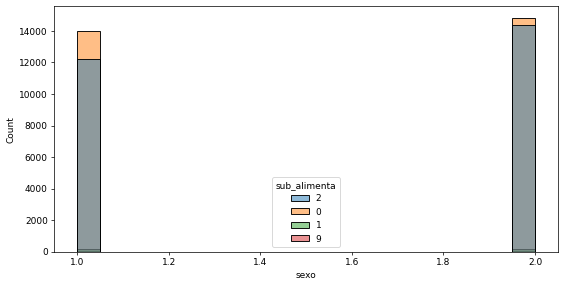

In [59]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=65)
p = sns.histplot(data=data4, x=data4["sexo"],hue=data4["sub_alimenta"],ax=ax)

In [61]:
data4 = data4.astype({"ingresos":"int8","escolaridad":"int8","estado_civil":"int8","edad":"int8","sub_alimenta":"int8","sub_transpor":"int8","sub_fami":"int8","sub_edu":"int8","horastraba":"int8"})

In [62]:
d = data4.select_dtypes('int64').columns
for col in d:
  data4[d] = data4[d].astype('int8')

In [63]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55778 entries, 0 to 55777
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ingresos      55778 non-null  int8 
 1   jefe_hogar    55778 non-null  int8 
 2   sexo          55778 non-null  int8 
 3   edad          55778 non-null  int8 
 4   estado_civil  55778 non-null  int8 
 5   escolaridad   55778 non-null  int8 
 6   time_traba    55778 non-null  int8 
 7   tipo_traba    55778 non-null  int8 
 8   horas_traba   55778 non-null  int8 
 9   sub_alimenta  55778 non-null  int8 
 10  sub_transpor  55778 non-null  int8 
 11  sub_fami      55778 non-null  int8 
 12  sub_edu       55778 non-null  int8 
 13  horastraba    55778 non-null  int8 
dtypes: int8(14)
memory usage: 762.7 KB


In [64]:
data4

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu,horastraba
0,0,1,2,28,6,13,42,1,48,2,1,1,2,48
1,0,5,2,53,6,3,42,1,48,2,1,1,2,48
2,64,1,2,51,6,11,96,1,48,2,1,2,2,48
3,64,3,2,26,6,14,96,1,48,2,1,2,2,48
4,64,3,2,21,6,11,96,1,48,2,1,2,2,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55773,0,5,1,33,6,5,7,4,48,0,0,0,0,48
55774,80,5,1,33,6,5,1,1,48,2,2,2,2,48
55775,0,5,1,33,6,5,6,4,48,0,0,0,0,48
55776,-80,5,1,33,6,5,6,4,48,0,0,0,0,48


In [65]:
data4.describe()

,ingresos,jefe_hogar,sexo,edad,estado_civil,escolaridad,time_traba,tipo_traba,horas_traba,sub_alimenta,sub_transpor,sub_fami,sub_edu,horastraba
count,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000,55778.000000
mean,-20.043834,2.430421,1.526946,41.939618,3.735595,10.391857,21.470257,2.758148,42.639392,0.966313,0.745061,0.901090,0.967245,42.639392
std,66.806910,1.602538,0.499278,16.315493,1.658949,4.471836,49.563231,1.569433,11.948366,1.017794,0.890481,0.984919,1.009867,11.948366
min,-128.000000,1.000000,1.000000,19.000000,1.000000,0.000000,-128.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-64.000000,1.000000,1.000000,28.000000,2.000000,7.000000,3.000000,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,-18.000000,2.000000,2.000000,40.000000,3.000000,11.000000,12.000000,4.000000,48.000000,0.000000,0.000000,0.000000,0.000000,48.000000
75%,32.000000,3.000000,2.000000,54.000000,6.000000,13.000000,48.000000,4.000000,48.000000,2.000000,2.000000,2.000000,2.000000,48.000000
max,126.000000,9.000000,2.000000,94.000000,6.000000,26.000000,127.000000,9.000000,60.000000,9.000000,9.000000,9.000000,9.000000,60.000000


In [66]:
data4.replace({'jefe_hogar':{1:1,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0},
               'cultura':{1:1,2:1,3:1,4:1,5:1,6:0},
               'sexo':{1:1,2:0},
               'estado_civil':{1:0,2:1,3:1,4:0,5:0,6:0},
               'sub_alimenta':{'1':1,'2':0,"9":0},
               'sub_transpor':{'1':1,'2':0,"9":0},
               "sub_fami":{'1':1,'2':0,"9":0},
               "sub_edu":{'1':1,'2':0,"9":0}},inplace=True)

In [67]:
df = data4

In [68]:
df.to_csv("data4.csv")

In [69]:
X = data4.filter(["jefe_hogar","cultura","sexo","edad","estado_civil","escolaridad","time_traba","tipo_traba","horas_traba","sub_alimenta","sub_transpor","sub_fami","sub_edu"])
y = data4["ingresos"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [71]:
rf_cls = RandomForestClassifier(n_estimators=10)
rf_cls.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [72]:
y_fit_train = rf_cls.predict(X_train)
y_pred = rf_cls.predict(X_test)

In [73]:
def metricas_clas(y_true, y_pred):
  print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
  print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
  print(f"Recall: {recall_score(y_true, y_pred,average='weighted')}")

In [74]:
print('---'*10)
print('Métricas en entrenamiento')
print('---'*10)
metricas_clas(y_train, y_fit_train)
print('---'*10)
print('Métricas en testeo')
print('---'*10)
metricas_clas(y_test, y_pred)

------------------------------
Métricas en entrenamiento
------------------------------
Accuracy: 0.9525122137062435
Precision: 0.9526058512686144
Recall: 0.9525122137062435
------------------------------
Métricas en testeo
------------------------------
Accuracy: 0.20141627823592687
Precision: 0.1870962623799309
Recall: 0.20141627823592687


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -128       0.17      0.22      0.19      1421
        -124       0.00      0.00      0.00         0
        -120       0.17      0.20      0.18         5
        -119       0.00      0.00      0.00         1
        -118       0.00      0.00      0.00         0
        -114       0.00      0.00      0.00         7
        -112       0.08      0.07      0.08       170
        -104       0.00      0.00      0.00        12
        -100       0.00      0.00      0.00         3
         -98       0.00      0.00      0.00         1
         -96       0.13      0.15      0.14       846
         -92       0.00      0.00      0.00         1
         -91       0.00      0.00      0.00         0
         -88       0.00      0.00      0.00        10
         -82       0.67      0.29      0.40         7
         -80       0.02      0.01      0.02       137
         -72       0.00      0.00      0.00         3
         -66       0.00    

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [76]:
explainer = shap.Explainer(rf_cls.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 11157it [1:08:01,  2.73it/s]


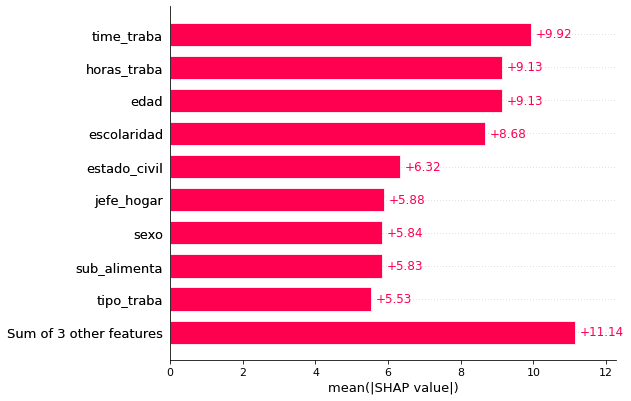

In [77]:
shap.plots.bar(shap_values)

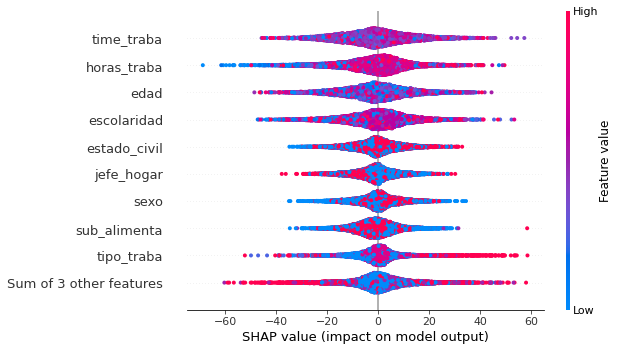

In [78]:
shap.plots.beeswarm(shap_values)

In [81]:
rf_cls_pickle9 = open("rf_clsproyecto9.pickle","wb")
pkl.dump(rf_cls,rf_cls_pickle9)
rf_cls_pickle9.close()

In [82]:
rf_cls_pickle9= open('rf_clsproyecto9.pickle','rb')
rf_cls = pkl.load(rf_cls_pickle9)
print(rf_cls)

RandomForestClassifier(n_estimators=10)
